In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from scipy import stats

/Users/Pengfei/opt/anaconda3/envs/mlvenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


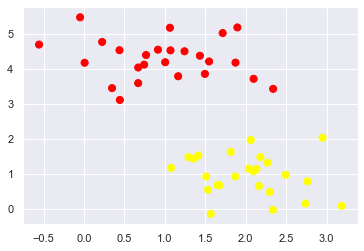

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X,y = make_blobs(n_samples = 50, centers =2, 
                random_state = 0, cluster_std = 0.6)
plt.scatter(X[:,0], X[:,1], c= y, s = 50, cmap = 'autumn');

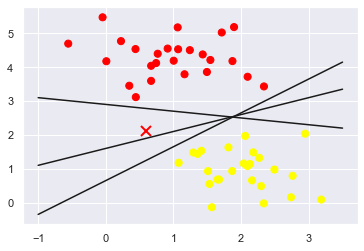

In [3]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0], X[:,1], c = y, s=50, cmap = 'autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

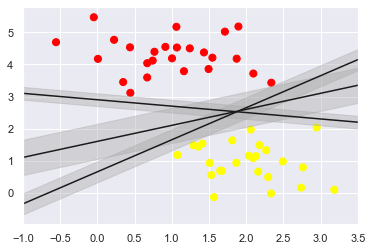

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
        # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=10, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

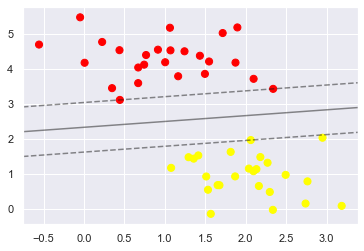

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);


In [8]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

## plot explain 

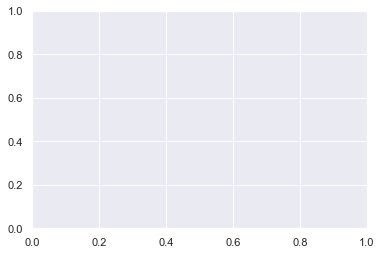

In [9]:
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
x = np.linspace(xlim[0], xlim[1], 30)
y = np.linspace(ylim[0], ylim[1], 30)
Y, X = np.meshgrid(y, x)
xy = np.vstack([X.ravel(), Y.ravel()]).T

In [15]:
# X.ravel()

In [11]:
X.shape

(30, 30)

In [12]:
xy.shape

(900, 2)

In [13]:
?SVC.decision_function


In [14]:
?ax.contour

# kernel SVM 

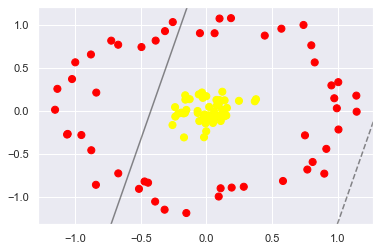

In [19]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor = 0.1, noise = 0.1)

clf = SVC(kernel = 'linear').fit(X,y)
plt.scatter(X[:, 0], X[:,1], c =y, s =50, cmap = 'autumn')
plot_svc_decision_function(clf, plot_support = False)

In [20]:
r = np.exp(-(X**2).sum(1))

In [25]:
from mpl_toolkits import mplot3d
from ipywidgets import interact

def plot_3D(elev = 30, azim = 30, X= X, y = y):
    ax =plt.subplot(projection = '3d')
    ax.scatter3D(X[:,0], X[:, 1], r, c =y, s =50, cmap =' autumn')
    ax.view_init(elev = elev, azim = azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

NameError: name 'fixed' is not defined

In [26]:
?interact

In [27]:
clf = SVC(kernel = 'rbf', C = 1E6)
clf.fit(X,y)

SVC(C=1000000.0)

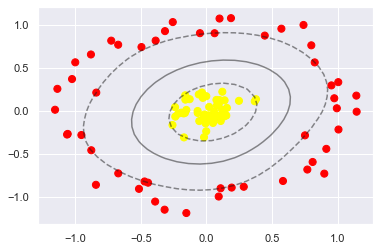

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

In [29]:
clf.support_vectors_

array([[ 0.06211806,  0.90158318],
       [ 0.10798585, -0.89770788],
       [-0.87599783, -0.45636123],
       [-0.83808996,  0.21273689],
       [ 0.74981258, -0.28346021],
       [ 0.82382026,  0.56314443],
       [-0.4706952 , -0.81889512],
       [-0.17075385, -0.30742472],
       [ 0.37715089,  0.13582427]])

#  tuning

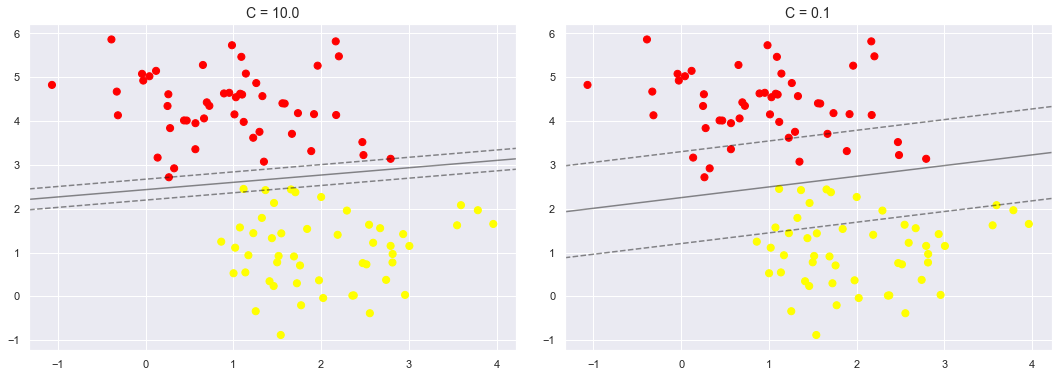

In [30]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# Face Recognition

In [2]:
from sklearn.datasets import fetch_lfw_people
from matplotlib.pyplot import imread
from PIL import Image
faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


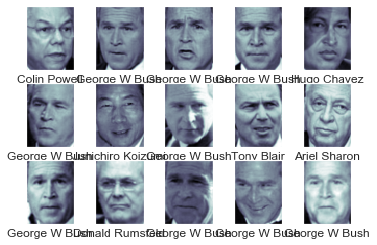

In [4]:
fig, ax = plt.subplots(3,5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap = 'bone')
    axi.set(xticks = [], yticks =[], 
           xlabel=faces.target_names[faces.target[i]])

In [6]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components = 150, whiten =True, random_state = 42)
svc = SVC(kernel = 'rbf', class_weight = 'balanced')
model = make_pipeline(pca, svc)


In [9]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                               random_state = 42)

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C':[1, 5, 10, 50],
              'svc__gamma':[0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1min 18s, sys: 3.76 s, total: 1min 22s
Wall time: 36.1 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [12]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

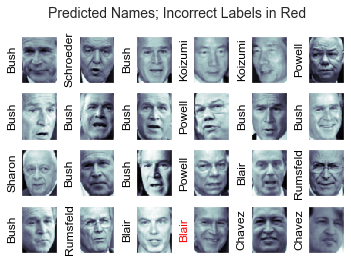

In [16]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62,47),cmap ='bone')
    axi.set(xticks = [], yticks =[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                  color = 'black' if yfit[i]==ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



Text(89.18, 0.5, 'predicted label')

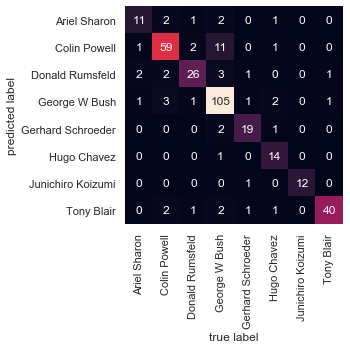

In [23]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square = True, annot= True,
           fmt = 'd', cbar = False, 
           xticklabels = faces.target_names,
           yticklabels = faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [24]:
mat # y = true, x = fit

array([[ 11,   1,   2,   1,   0,   0,   0,   0],
       [  2,  59,   2,   3,   0,   0,   0,   2],
       [  1,   2,  26,   1,   0,   0,   0,   1],
       [  2,  11,   3, 105,   2,   1,   0,   2],
       [  0,   0,   1,   1,  19,   0,   1,   1],
       [  1,   1,   0,   2,   1,  14,   0,   1],
       [  0,   0,   0,   0,   0,   0,  12,   0],
       [  0,   0,   1,   1,   0,   0,   0,  40]])